<a href="https://colab.research.google.com/github/JoyeBright/Tensorflow-Tutorial/blob/master/FashionMNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("There are {} images in train set which each has {}*{} pixels".format(x_train.shape[0], x_train.shape[1], x_train.shape[2]))
print("There are {} images in test set which each has {}*{} pixels".format(x_test.shape[0], x_test.shape[1], x_test.shape[2]))

There are 60000 images in train set which each has 28*28 pixels
There are 10000 images in test set which each has 28*28 pixels


In [2]:
print("The installed Tensorflow version is {}" .format(tf.__version__))

The installed Tensorflow version is 2.2.0


**Let's normalize the pixel values within a range between 0 and 1 rather than 0 and 255**

In [0]:
import numpy as np

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /=255
  return images, labels

(x_train, y_train) = normalize(x_train, y_train)
(x_test, y_test) = normalize (x_test, y_test)
training_set = np.asarray((x_train, y_train))
test_set = np.asarray((x_test, y_test))

**Show Dataset Images**

In [0]:
training_set = training_set.T
test_set = test_set.T

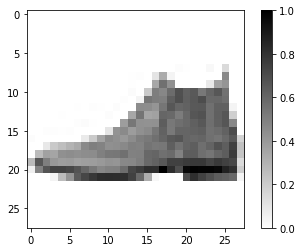

In [5]:
import matplotlib.pyplot as plt
for image, label in test_set:
  break

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',  'Bag', 'Ankle boot']

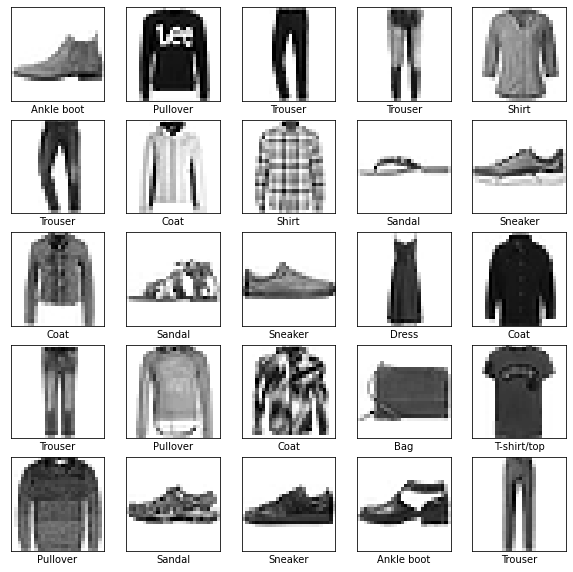

In [7]:
plt.figure(figsize=(10, 10))
i = 0
for images, label in test_set[0:25]:
    #image = image.reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()


## **Time to create our neural model**

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [10]:
import math
x_train = np.expand_dims(x_train, -1)
print(x_train.shape)
BATCHSIZE = 32
number_train_examples = training_set.shape[0]
model.fit(x_train, y_train, epochs=5, steps_per_epoch=math.ceil(number_train_examples/BATCHSIZE))

(60000, 28, 28, 1)
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4991 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3750 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3362 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3120 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2930 - accuracy: 0.8923


In [13]:
num_test_examples = test_set.shape[0]
test_loss, test_accuracy = model.evaluate(x_test, y_test, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8683
Accuracy on test dataset: 0.8683000206947327
